In [585]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

%matplotlib inline

## Data 
The data contains anonymous information such as age, occupation, education, working class, etc. The goal is to train a binary classifier to predict the income which has two possible values ‘>50K’ and ‘<50K’. There are 48842 instances and 14 attributes in the dataset. The data contains a good blend of categorical, numerical and missing values.

##### Target Value : Income

In [586]:
#Loading the data
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", 
           "occupation", "relationship","race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
train_data=pd.read_csv('adultdata.csv',names=columns,sep=' *, *',na_values='?',engine='python')
test_data=pd.read_csv('adulttest.csv',names=columns,skiprows=1, sep=' *, *',na_values='?', engine='python')

## Exploratory Data Analysis

In [587]:
train_data.head()

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [588]:
print(train_data.shape)
print(test_data.shape)

(32561, 15)
(16281, 15)


In [589]:
train_data.isnull().sum()

age                  0
workClass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [590]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workClass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Observations

1. There are 32561 samples in the training dataset
2. There are both categorical and numerical columns in the dataset
3. The columns workClass, occupation, native-country have missing values

In [591]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workClass         15318 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education-num     16281 non-null int64
marital-status    16281 non-null object
occupation        15315 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital-gain      16281 non-null int64
capital-loss      16281 non-null int64
hours-per-week    16281 non-null int64
native-country    16007 non-null object
income            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [592]:
train_data.drop(['fnlwgt', 'education'], axis=1, inplace=True)
test_data.drop(['fnlwgt', 'education'], axis=1, inplace=True)

print(train_data.shape)
print(test_data.shape)

(32561, 13)
(16281, 13)


## Handling Numerical Data



In [593]:
num_attributes=train_data.select_dtypes(include=['int64'])
print(num_attributes.columns)

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [594]:
train_data['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
         ...  
9562         4
1086         4
25124        4
1424         3
2961         3
7896         3
4687         3
2936         3
1173         3
5721         3
2009         3
6360         3
41310        2
6723         2
3456         2
2993         2
401          2
11678        2
2062         2
18481        2
7978         1
1639         1
2538         1
2387         1
5060         1
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capital-gain, Length: 119, dtype: int64

In [595]:
yTest.value_counts(),yTrain.value_counts()

(0    16274
 1        7
 Name: Yugoslavia, dtype: int64, 0    32545
 1       16
 Name: Yugoslavia, dtype: int64)

##### Note
fnlwgt: sampling weight (i will not include it in model)                                                                       
education-num: number of years of education in total                                                                           
capital-gain/capital-loss: income from investment sources other than salary/wages                                              

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002551B480B70>,
      dtype=object)

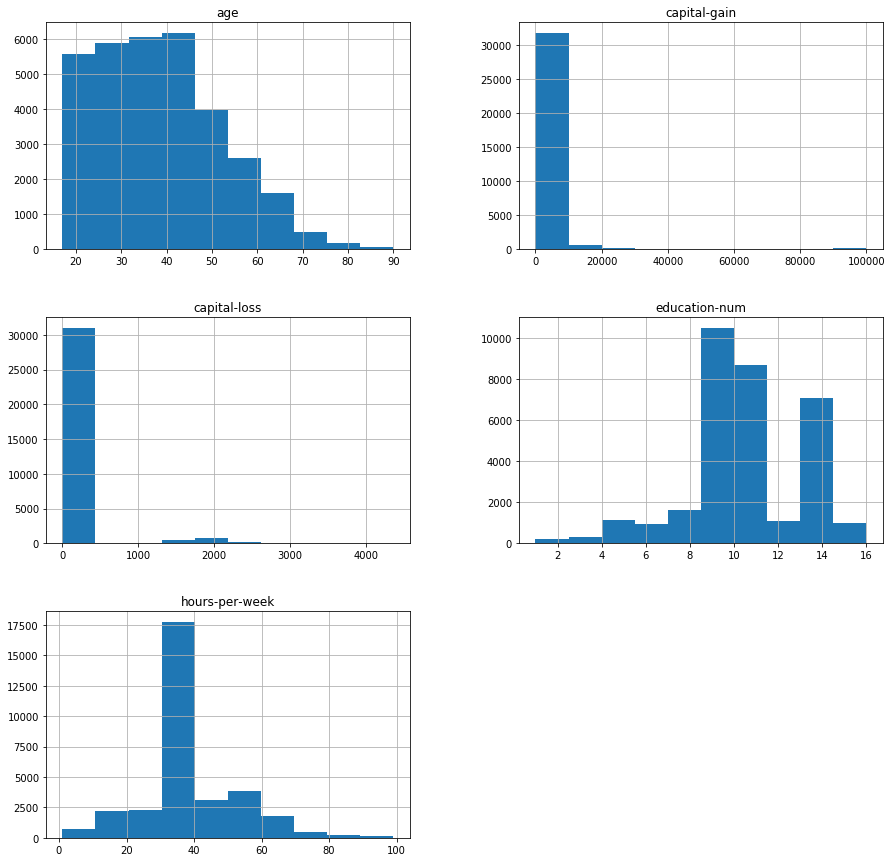

In [596]:
#Data Visulaization
num_attributes.hist(figsize=(15,15))

In [597]:
train_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


##### Observations

1. None of the numerical attributes have missing values
2. The values are on different scales. Many machine learning models require the values to be on the same scale. We will use        StandardScaler from the sklearn library to scale the features.

## Handling Categorical Data

In [598]:
cat_attributes = train_data.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['workClass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'income'],
      dtype='object')


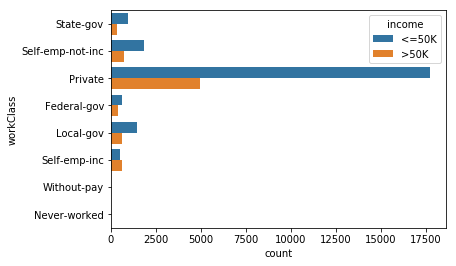

In [599]:
#data visualization
sns.countplot(y='workClass',hue='income',data=cat_attributes)

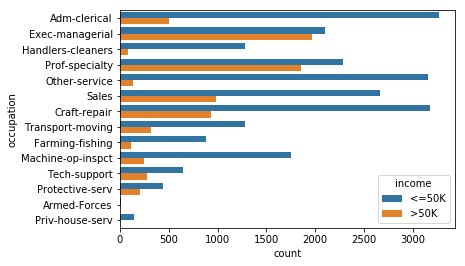

In [600]:
sns.countplot(y='occupation', hue='income', data = cat_attributes)

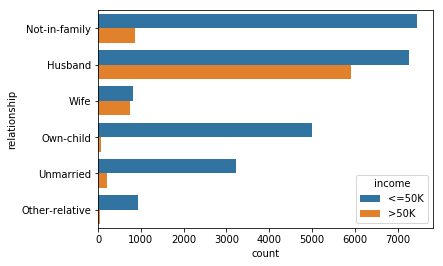

In [601]:
sns.countplot(y='relationship', hue='income', data = cat_attributes)

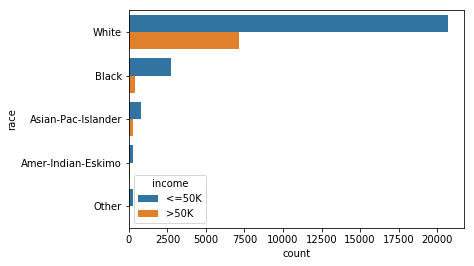

In [602]:
sns.countplot(y='race', hue='income', data = cat_attributes)

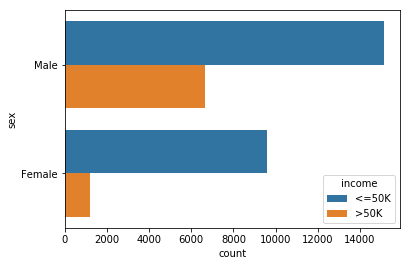

In [603]:
sns.countplot(y='sex', hue='income', data = cat_attributes)

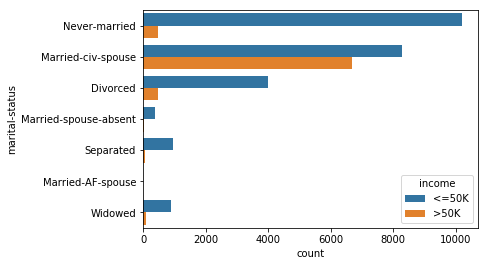

In [604]:
sns.countplot(y='marital-status', hue='income', data = cat_attributes)

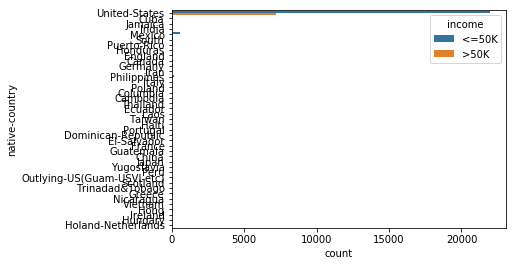

In [605]:
sns.countplot(y='native-country',hue='income',data=cat_attributes)

In [606]:
print(train_data.shape)
print(test_data.shape)

(32561, 13)
(16281, 13)


##### Observations
1. The variables workClass, occupation, native-country have missing values. We will replace the missing values in each column      with the most_frequent occurring value of that column.
2. The column education is just a string representation of the column education-num. We will drop the education column.

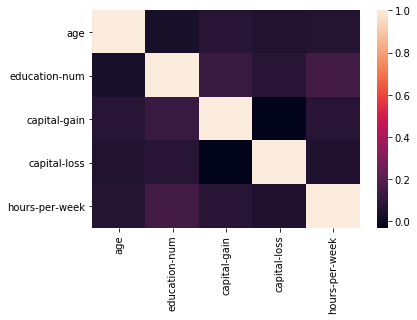

In [607]:
#Making heatMAP
sns.heatmap(train_data.corr())

## Removing Nan Values

In [608]:
#METHOD-1
#Removing Nan values from train data
# print(train_data.isnull().sum())
# nanColumns=['workClass','occupation','native-country']
# 
# for col in nanColumns:
#     value=train_data[col].value_counts().max()
#     train_data[col]=train_data[col].fillna(value)
#     test_data[col]=test_data[col].fillna(value)
#     
# print('-'*30)
# print(train_data.isnull().sum())

In [609]:
train_data['workClass']=train_data['workClass'].fillna('No work class')
test_data['workClass']=test_data['workClass'].fillna('No work class')

train_data['occupation']=train_data['occupation'].fillna('No occupation')
test_data['occupation']=test_data['occupation'].fillna('No occupation')

value=train_data['native-country'].value_counts().max()
train_data['native-country']=train_data['native-country'].fillna(value)

In [610]:
#Removing Nan values from train data
print(test_data.isnull().sum())


age                 0
workClass           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [611]:
print(train_data.shape)
print(test_data.shape)

(32561, 13)
(16281, 13)


### One Hot Encoding

In [612]:
cat_attributes.columns

Index(['workClass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'income'],
      dtype='object')

In [613]:
print(train_data.shape)
print(test_data.shape)

(32561, 13)
(16281, 13)


In [614]:
# work=pd.get_dummies(train_data['workClass'],drop_first=True)
# 
# train_data.drop(['workClass'],axis=1,inplace=True)
# 
# train_data=pd.concat([train_data,work],axis=1)


for col in cat_attributes:
    #For training data
    newcol=pd.get_dummies(train_data[col],drop_first=True)
    train_data.drop([col],axis=1,inplace=True)
    train_data=pd.concat([train_data,newcol],axis=1)
    
    #For testing data
    test_newcol=pd.get_dummies(test_data[col],drop_first=True)
    test_data.drop([col],axis=1,inplace=True)
    test_data=pd.concat([test_data,test_newcol],axis=1)

In [615]:
final_train_data,final_test_data=train_data.align(test_data,join='inner',axis=1)

In [616]:
print(final_train_data.shape)
print(final_test_data.shape)

(32561, 82)
(16281, 82)


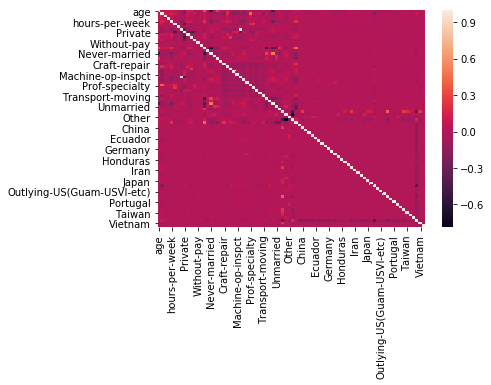

In [617]:
corr=final_train_data.corr()
sns.heatmap(corr)

# Training Data


In [618]:
xTrain=final_train_data.iloc[:,:-1]
yTrain=final_train_data.iloc[:,-1]

xTest=final_test_data.iloc[:,:-1]
yTest=final_test_data.iloc[:,-1]


In [619]:

from sklearn.linear_model import LogisticRegression
logmodel= LogisticRegression(solver='liblinear',class_weight='balanced')
logmodel.fit(xTrain,yTrain)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Testing the model


In [620]:
yPred = logmodel.predict(xTest) 

In [621]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(yTest,yPred)

array([[16109,   165],
       [    1,     6]], dtype=int64)

In [622]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16274
           1       0.04      0.86      0.07         7

   micro avg       0.99      0.99      0.99     16281
   macro avg       0.52      0.92      0.53     16281
weighted avg       1.00      0.99      0.99     16281



In [623]:
from sklearn.metrics import accuracy_score
accuracy_score(yPred, yTest)

0.9898040660893066